Pure Node :- If the decision is 100% then there is no need move futher node
OverCast :- 

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel("./files/bank.xlsx")

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
df["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

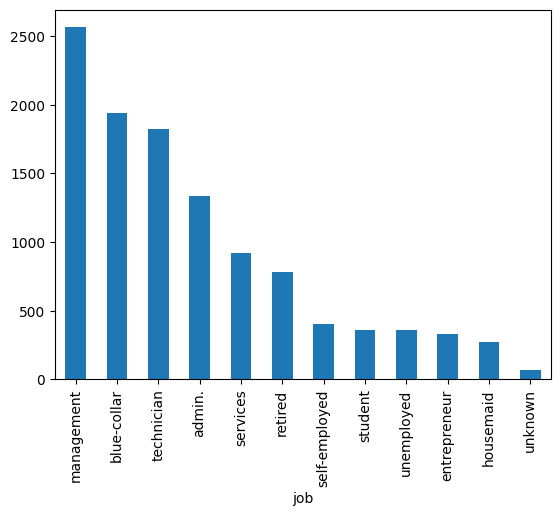

In [10]:
df['job'].value_counts().plot.bar()

plt.show()

In [11]:
df["marital"].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [12]:
df["education"].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
df["default"] = np.where(df["default"] == "yes", 1, 0)
df["housing"] = np.where(df["housing"] == "yes", 1, 0)
df["loan"] = np.where(df["loan"] == "yes", 1, 0)
df["deposit"]= np.where(df["deposit"] == "yes", 1, 0)

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [16]:
df.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

In [17]:
#dummies
df["poutcome"] = df["poutcome"].replace({"other": "unknown"})

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [19]:
df["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [20]:
df["job"] = df["job"].replace(["management", "admin.", "entrepreneur"],"white_collar")

In [21]:
df["job"] = df["job"].replace(["technician", "services"], "blue_collar")

In [22]:
df["job"] = df["job"].replace(["retired", "self-employed", "housemaid"], "self_depend")

In [23]:
df["job"] = df["job"].replace(["student"], "unemployed")

In [24]:
df["job"].value_counts()

job
white_collar    4228
blue_collar     2746
blue-collar     1944
self_depend     1457
unemployed       717
unknown           70
Name: count, dtype: int64

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white_collar,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,white_collar,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,blue_collar,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,blue_collar,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,white_collar,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [26]:
df["pdays"].unique()

array([ -1, 166,  91, 147, 170, 150, 171, 126, 182, 110, 198, 174, 175,
        27, 128, 100, 177, 167, 122, 183, 195, 133, 178,  34,  10, 163,
       184, 154,  99,  93,   2, 242, 272,  76, 160,  90, 196, 246, 238,
       203, 268, 189, 267,  92,   9,  88,  85, 210, 257, 261, 270, 106,
       199, 112,  41, 294, 231, 239, 302, 135, 307, 222, 138, 323, 141,
       320, 264, 316, 315, 256, 146, 328,  74, 148, 327, 341, 145, 266,
       234, 345, 318, 325, 274, 343, 260, 305, 344, 254, 180, 340,  82,
       181, 278, 153,   4, 349, 334, 176,  87, 269,  86, 169,  83,  79,
         6, 259,  13, 161, 350,  84,  80, 164,  22, 296,  66, 263, 333,
        17,  89,  78, 286, 337, 364, 188, 342, 363, 352, 295, 353, 356,
       288, 367, 366, 359, 347, 370, 284, 300, 306, 361, 287, 301, 355,
       371, 292, 360, 358, 346, 357, 368, 312, 179, 329, 298, 372, 374,
       375, 291,  95, 109,  94,  98, 186, 101, 187, 321,  40,  96,  21,
        35,  97, 285, 103, 212, 293,  81,  38,  28,  67,  60, 12

In [27]:
df.drop(columns = 'month', inplace=True)

In [28]:
df.select_dtypes(include=['int', 'float']).columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'deposit'],
      dtype='object')

In [29]:
#age ---> top
#balance ---> top and bottom
# pdays ---> top
# duration ---> top

In [30]:
df["pdays"]  = np.where(df["pdays"] == -1,1, df['pdays'])

In [31]:
def IQR(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

In [32]:
IQR(df["pdays"])

(np.float64(-28.625), np.float64(50.375))

In [33]:
df["age"] = np.where(df["age"] > 74, 74, df["age"])
df["balance"] = np.where(df["balance"] > 4887, 4887, df["balance"])
df["balance"] = np.where(df["balance"] < -2257, -2257, df["balance"])
df["pdays"] = np.where(df["pdays"] > 50, 50, df["pdays"])
df["duration"] = np.where(df["duration"] > 1033, 1033, df["duration"])
df["campaign"] = np.where(df["campaign"] > 6, 6, df["campaign"])
df["previous"] = np.where(df["previous"] > 2, 2, df["previous"])

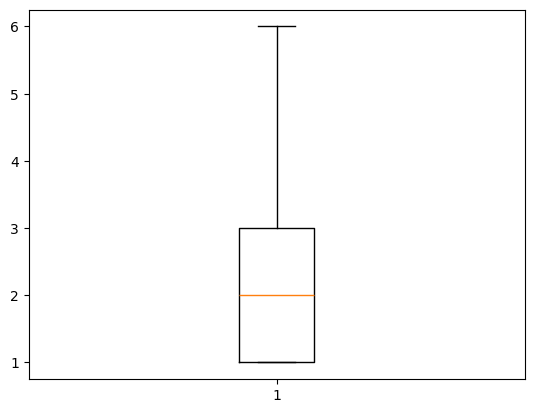

In [34]:
plt.boxplot(df["campaign"])
plt.show()

In [35]:
df.select_dtypes(include=["object"]).columns

Index(['job', 'marital', 'education', 'contact', 'poutcome'], dtype='object')

In [36]:
bank = pd.get_dummies(df, columns=["job", "marital", "education", "contact", "poutcome"], drop_first=True)

In [37]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   default              11162 non-null  int64
 2   balance              11162 non-null  int64
 3   housing              11162 non-null  int64
 4   loan                 11162 non-null  int64
 5   day                  11162 non-null  int64
 6   duration             11162 non-null  int64
 7   campaign             11162 non-null  int64
 8   pdays                11162 non-null  int64
 9   previous             11162 non-null  int64
 10  deposit              11162 non-null  int64
 11  job_blue_collar      11162 non-null  bool 
 12  job_self_depend      11162 non-null  bool 
 13  job_unemployed       11162 non-null  bool 
 14  job_unknown          11162 non-null  bool 
 15  job_white_collar     11162 non-null  bool 
 16  marital_married      1

In [38]:
x = bank.drop(columns=["deposit"])
y = bank["deposit"]

In [39]:
bank.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'deposit', 'job_blue_collar',
       'job_self_depend', 'job_unemployed', 'job_unknown', 'job_white_collar',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, bank["deposit"], test_size=0.2, random_state=55)

In [41]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
print("Train accuracy" , log.score(x_train, y_train))
print("Test accuracy" , log.score(x_test, y_test))


Train accuracy 0.8012095419419868
Test accuracy 0.7908643081056874


In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 5)
dt.fit(x_train, y_train)
print("Train accuracy" , dt.score(x_train, y_train))
print("Test accuracy" , dt.score(x_test, y_test))

Train accuracy 1.0
Test accuracy 0.7281683833407971


Overfit := If the accuracy of the train data is more tha data
underfit :- When the accuracy of test data is more than traning data
Treatment of overfit and underfit problem 
Hyper parameter tuning 

In [43]:
dt = DecisionTreeClassifier(max_depth=1, random_state=5)
dt.fit(x_train, y_train)
print("Train accuracy" , dt.score(x_train, y_train))
print("Test accuracy" , dt.score(x_test, y_test))

Train accuracy 0.7113898532870422
Test accuracy 0.7044334975369458


In [44]:
# DecisionTreeClassifier(*, criterion  = 'gini', max_depth = None, min_samples_split = 2, min_samples_leaf=1, random_state = None )


In [45]:
criterion = ["gini"]  # default, use a list
max_depth = [4, 6, 8, 10, 12, 14]
min_sam_sp = [3, 4, 5, 6, 7, 8, 9, 10]
for c in criterion:
    for m in max_depth:
        for s in min_sam_sp:
            dt = DecisionTreeClassifier(criterion=c, max_depth=m, min_samples_split=s, min_samples_leaf=2, random_state=5)
            dt.fit(x_train, y_train)
            print("Train accuracy", dt.score(x_train, y_train))
            print("Test accuracy", dt.score(x_test, y_test))
            print("----------------------------------------------")

Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
----------------------------------------------
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
----------------------------------------------
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
----------------------------------------------
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
----------------------------------------------
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
----------------------------------------------
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
----------------------------------------------
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
----------------------------------------------
Train accuracy 0.7757867622354127
Test accuracy 0.7671294223018361
----------------------------------------------
Train accuracy 0.8140889237316609
Test accuracy 0.786833855799373
----------------------

In [46]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   default              11162 non-null  int64
 2   balance              11162 non-null  int64
 3   housing              11162 non-null  int64
 4   loan                 11162 non-null  int64
 5   day                  11162 non-null  int64
 6   duration             11162 non-null  int64
 7   campaign             11162 non-null  int64
 8   pdays                11162 non-null  int64
 9   previous             11162 non-null  int64
 10  deposit              11162 non-null  int64
 11  job_blue_collar      11162 non-null  bool 
 12  job_self_depend      11162 non-null  bool 
 13  job_unemployed       11162 non-null  bool 
 14  job_unknown          11162 non-null  bool 
 15  job_white_collar     11162 non-null  bool 
 16  marital_married      1

In [47]:
dt = DecisionTreeClassifier(criterion= "entropy", min_samples_split=10, min_samples_leaf= 1, random_state = 55)
dt.fit(x_train, y_train)
print("train acc", dt.score(x_train, y_train ))
print("test acc", dt.score(x_test, y_test ))


train acc 0.9328032254451787
test acc 0.7442901925660547


In [48]:
from sklearn.tree import plot_tree

In [49]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), dpi=1000)
# plot_tree(dt, feature_names=x_train.columns, class_names=['yes', 'no'],
#           filled=True)
# plt.show()

In [50]:
from sklearn import tree


In [51]:
rules = tree.export_text(dt, feature_names=x_train.columns, class_names=['yes', 'no'])
print(rules)

|--- duration <= 203.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 90.50
|   |   |   |--- duration <= 62.50
|   |   |   |   |--- age <= 34.50
|   |   |   |   |   |--- balance <= 297.00
|   |   |   |   |   |   |--- class: yes
|   |   |   |   |   |--- balance >  297.00
|   |   |   |   |   |   |--- age <= 23.50
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |--- age >  23.50
|   |   |   |   |   |   |   |--- balance <= 302.50
|   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |--- balance >  302.50
|   |   |   |   |   |   |   |   |--- day <= 30.00
|   |   |   |   |   |   |   |   |   |--- age <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- balance <= 4062.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- balance >  4062.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |   |   |--- age >  29.50
|   |   |   |   | 

##Grid Search :- It is use for hyper parameter tuning where it return the best fit results

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
dt

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,55
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
# pars = {
#     "criterion": ["gini", 'entropy'],
#     'max_depth': [2,4,6,8,10,12,14,16,18,20],
#     "min_samples_split": [10, 20, 30, 40, 50, 60 , 70, 80, 90,100],
#     "min_samples_leaf": [1,2,3]


# }
# tre = DecisionTreeClassifier(random_state= 55 )
# grid = GridSearchCV(tre, param_grid = pars, cv = 5, verbose= 1, n_jobs=1)
# grid.fit(x_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


KeyboardInterrupt: 

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf1 = RandomForestClassifier(n_estimators=200 ,random_state= 88)

In [80]:
rf1.fit(x_train, y_train)
print("Train Accu", rf1.score(x_train, y_train))
print("Test Accu", rf1.score(x_test, y_test))

Train Accu 1.0
Test Accu 0.8154948499776086


In [81]:
model = [100 , 150 , 200, 250, 300, 350]
cri = ["gini", "entropy"]
md = [10,20,30,40,50,60,70,80,90,100]
ms = [40, 50, 60, 70, 80, 90, 100]
for m in model:
    for c in cri:
        for d in md:
            for s in ms:
                rf = RandomForestClassifier(n_estimators=m, criterion=c, max_depth=d, min_samples_split=s, random_state=88)
                rf.fit(x_train, y_train)
                print("model ->{} , cri ->{} , max_sam -> {} ".format(m,c,d,s))
                print("Train accuracy:", rf.score(x_train, y_train))
                print("Test accuracy:", rf.score(x_test, y_test))
                print("============================================")

model ->100 , cri ->gini , max_sam -> 10 
Train accuracy: 0.8482472841303618
Test accuracy: 0.8168383340797134
model ->100 , cri ->gini , max_sam -> 10 
Train accuracy: 0.8462313808937171
Test accuracy: 0.8159426780116436
model ->100 , cri ->gini , max_sam -> 10 
Train accuracy: 0.8443274722813305
Test accuracy: 0.8141513658755039
model ->100 , cri ->gini , max_sam -> 10 
Train accuracy: 0.8446634561541047
Test accuracy: 0.8137035378414689
model ->100 , cri ->gini , max_sam -> 10 
Train accuracy: 0.8432075260387502
Test accuracy: 0.8163905060456784
model ->100 , cri ->gini , max_sam -> 10 
Train accuracy: 0.8419755851719117
Test accuracy: 0.812807881773399
model ->100 , cri ->gini , max_sam -> 10 
Train accuracy: 0.8404076604322992
Test accuracy: 0.8132557098074339
model ->100 , cri ->gini , max_sam -> 20 
Train accuracy: 0.8609026766715198
Test accuracy: 0.8190774742498881
model ->100 , cri ->gini , max_sam -> 20 
Train accuracy: 0.8570948594467466
Test accuracy: 0.8181818181818182
mo

KeyboardInterrupt: 